In [2]:
import pandas as pd
import numpy as np

In [3]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [4]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_ins"

In [5]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [6]:
rh_18_20 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [7]:
dt_18_20 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash"] ] #Datos del (18-20)
sc_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["21_23_sc"] ] #SC del (21-23)

dt_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash"] ] #Datos del (21-23)
sc_24_26 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["24_26_sc"] ] #SC del (24-26)

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [8]:
Z = dt_21_23

### Agregamos los features 

In [9]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" ) 
ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" )
ftr_03_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" )
ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" )
ftr_06_Z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" )
ftr_08_Z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv" )
ftr_09_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" )
ftr_10_Z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv" )
ftr_11_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" )
ftr_12_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" )
ftr_13_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" )
ftr_15_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv" )

In [10]:
Z = Z.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_02_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_03_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_05_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_07_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_08_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_09_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_10_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_11_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_14_Z, how = "inner", on = "ref_hash" )
Z = Z.merge( ftr_15_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [11]:
Y = sc_21_23

In [12]:
X = dt_18_20

### Agregamos los features

In [13]:
ftr_01_X = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv" )
ftr_02_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" )
ftr_03_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" )
ftr_04_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" )
ftr_06_X = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv" )
ftr_07_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" )
ftr_08_X = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv" )
ftr_09_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" )
ftr_10_X = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv" )
ftr_11_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" )
ftr_12_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" )
ftr_13_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" )
ftr_14_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" )
ftr_15_X = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv" )

In [14]:
X = X.merge( ftr_01_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_02_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_03_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_04_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_05_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_06_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_07_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_08_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_09_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_10_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_11_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_12_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_13_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_14_X, how = "inner", on = "ref_hash" )
X = X.merge( ftr_15_X, how = "inner", on = "ref_hash" )

## Dropeamos los ref_hash (No estan codificados)

In [15]:
X = X.drop( "ref_hash", axis = 1 )
Z = Z.drop( "ref_hash", axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> 

In [16]:
import xgboost as xgb
import graphviz as gr 

In [230]:
prm = {"objective" :'reg:linear', 
       "colsample_bytree" : 0.5, 
       "learning_rate" : 0.1,
       "max_depth" : 2,
       "alpha" : 10,
       "n_estimators" : 120 }

estimator = xgb.XGBRegressor( **prm )

In [231]:
pmt = estimator.fit( X,Y )

In [232]:
prd = estimator.predict( Z )

## Calculamos el RMSE

In [233]:
from sklearn.metrics import mean_squared_error

In [234]:
rmse = np.sqrt( mean_squared_error(sc_24_26, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 25504.248825


In [236]:
record = 25504.248825

## Tunning de HyperParameters

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
from sklearn.metrics import neg_mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [160]:
reg = xgb.XGBRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'learning_rate': [0.01, 0.05, 0.1,0.15],
             'n_estimators': [80,120,200,250]
            }

grid = RandomizedSearchCV( estimator = estimator, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit( X, Y )    

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.15, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.15], 'n_estimators': [80, 120, 200, 250]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(mean_squared_error, greater_is_better=False),
          verbose=0)

In [161]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

||            Results from Grid Search                  ||

 The best estimator across ALL searched params:
 XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.15, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 The best score across ALL searched params:
 -731108209.7374625

 The best parameters across ALL searched params:
 {'n_estimators': 120, 'max_depth': 3, 'learning_rate': 0.15}


## Graficamos el Arbol

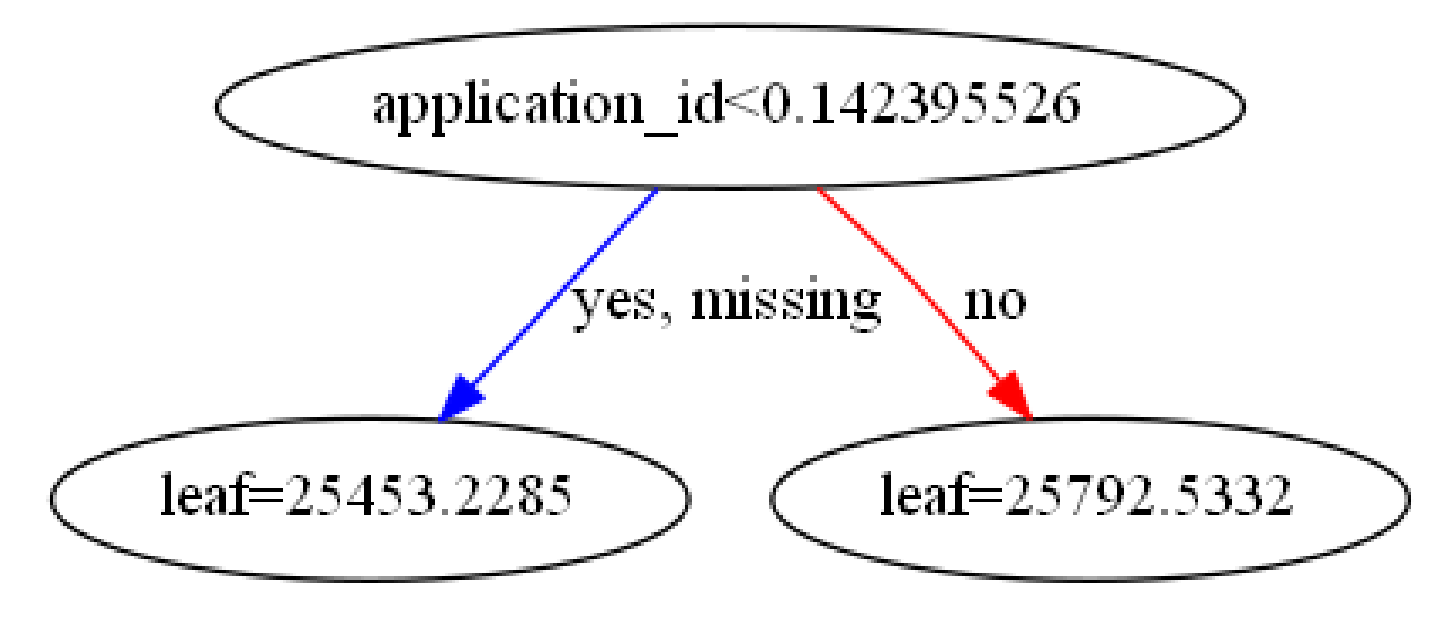

In [132]:
import matplotlib.pyplot as plt

import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dtrn = xgb.DMatrix(X,Y)

xg_reg = xgb.train(params = prm, dtrain = dtrn, num_boost_round=10)

xgb.plot_tree(xg_reg)
plt.rcParams['figure.figsize'] = [25, 15]
plt.show()